# Feature Selection

In this notebook, we perform **feature selection** to identify the most relevant and non-redundant features 
from the engineered dataset. This step ensures that only useful variables are included in the anomaly detection model, 
reducing noise, avoiding overfitting, and improving computational efficiency.

We will apply:
- Variance threshold filtering
- Correlation analysis
- Feature importance (tree-based models)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier


In [7]:
df = pd.read_csv("../Data/processed/engineered_stocks.csv")

df.head()

,Date,Close,High,Low,Open,Volume,Daily_Return,MA_7,MA_30,Volatility_7,Volatility_30,Cumulative_Return
0,2023-02-15,153.403671,153.571561,150.984058,151.211201,65573800,0.013903,150.980207,140.181550,0.014182,0.014632,1.243841
1,2023-02-16,151.803787,154.391291,151.448251,151.606256,68167900,-0.010429,150.880851,141.088253,0.013145,0.014976,1.230868
2,2023-02-17,150.658188,151.102604,148.979273,150.460671,59144100,-0.007547,151.002415,142.000814,0.011395,0.014864,1.221579
3,2023-02-21,146.638641,149.423677,146.569517,148.337312,58867200,-0.026680,150.697673,142.628189,0.015392,0.014966,1.188988
4,2023-02-22,147.063278,148.090374,145.334981,147.023766,51011300,0.002896,150.401391,143.252299,0.015414,0.014970,1.192431


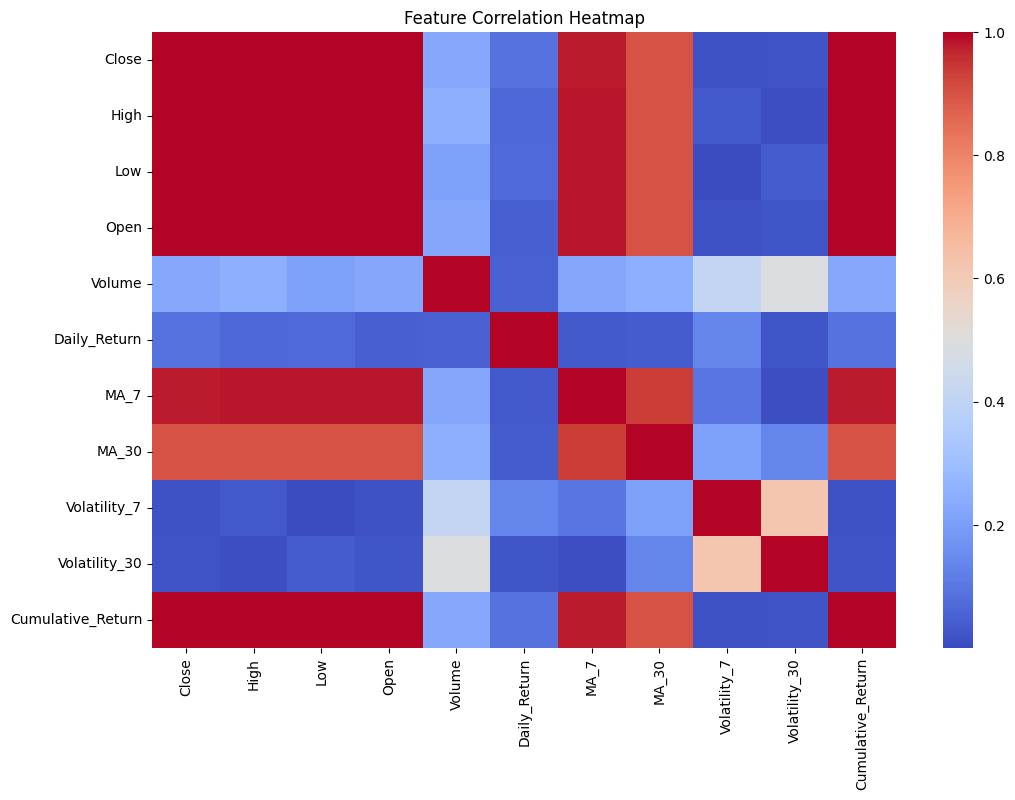

In [11]:
# Select only numeric features (exclude Date or categorical cols)
selected_cols = [col for col in df.columns if col not in ["Date"]]

# Compute correlation matrix
corr_matrix = df[selected_cols].corr().abs()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
# Upper triangle matrix of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:", to_drop)

# Keep only non-correlated features
reduced_df = df[selected_cols].drop(columns=to_drop, errors="ignore")
reduced_df.head()


Highly correlated features to drop: ['High', 'Low', 'Open', 'MA_7', 'MA_30', 'Cumulative_Return']


,Close,Volume,Daily_Return,Volatility_7,Volatility_30
0,153.403671,65573800,0.013903,0.014182,0.014632
1,151.803787,68167900,-0.010429,0.013145,0.014976
2,150.658188,59144100,-0.007547,0.011395,0.014864
3,146.638641,58867200,-0.026680,0.015392,0.014966
4,147.063278,51011300,0.002896,0.015414,0.014970


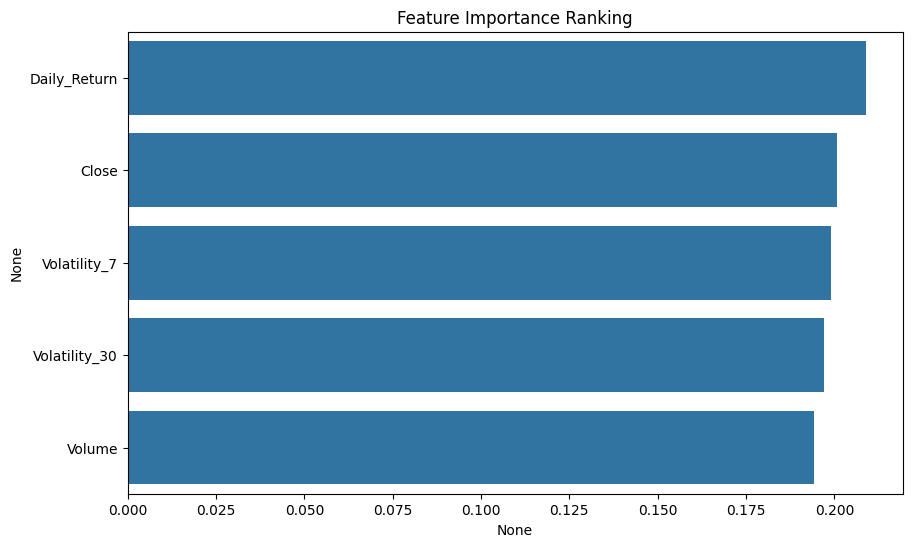

Top Selected Features: ['Daily_Return', 'Close', 'Volatility_7', 'Volatility_30', 'Volume']


In [13]:
from sklearn.ensemble import RandomForestClassifier

# For demonstration, create a dummy anomaly label (replace later with real labels if available)
df["anomaly"] = np.random.randint(0, 2, size=len(df))

X = reduced_df
y = df["anomaly"]

# Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance ranking
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance Ranking")
plt.show()

print("Top Selected Features:", importances.head(10).index.tolist())


In [14]:

reduced_df.to_csv("../Data/processed/selected_features.csv", index=False)
print("Selected features saved to ../Data/processed/selected_features.csv")


Selected features saved to ../Data/processed/selected_features.csv
